In [379]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [380]:
raw_dataset = pd.read_csv('ce475_project_data.csv', delimiter=';')
dataset = raw_dataset.copy()
test_data = dataset.tail(20)
dataset = dataset.drop(test_data.index)
mse = make_scorer(mean_squared_error)
mae = make_scorer(mean_absolute_error)

In [381]:
dataset.head()

,x1,x2,x3,x4,x5,x6,Y
0,1,37,12,65,-18,1,1.0
1,27,14,6,85,11,27,-24.0
2,34,13,14,63,-16,34,4092.0
3,5,18,24,83,-4,5,121.0
4,31,44,10,57,-7,31,2441.0


In [382]:
test_data.head()

,x1,x2,x3,x4,x5,x6,Y
100,8,46,30,32,5,8,NaN
101,10,23,16,27,13,10,NaN
102,6,9,28,76,-20,6,NaN
103,11,31,3,46,-11,11,NaN
104,12,27,0,98,20,12,NaN


In [383]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      120 non-null    int64  
 1   x2      120 non-null    int64  
 2   x3      120 non-null    int64  
 3   x4      120 non-null    int64  
 4   x5      120 non-null    int64  
 5   x6      120 non-null    int64  
 6   Y       100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 6.7 KB


In [384]:
pd.DataFrame(raw_dataset.isna().sum()).T

,x1,x2,x3,x4,x5,x6,Y
0,0,0,0,0,0,0,20


In [385]:
dataset.describe().T[['min', 'max', 'mean']]

,min,max,mean
x1,0.0,40.0,19.29
x2,0.0,50.0,22.53
x3,0.0,35.0,16.68
x4,0.0,100.0,50.60
x5,-20.0,20.0,-1.44
x6,0.0,40.0,19.29
Y,-42.0,12402.0,1746.82


In [386]:
predictors = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']

In [387]:
dataset.corr()

,x1,x2,x3,x4,x5,x6,Y
x1,1.000000,-0.167880,-0.051437,-0.153805,0.091953,1.000000,0.300764
x2,-0.167880,1.000000,-0.047579,-0.072409,-0.191095,-0.167880,0.071139
x3,-0.051437,-0.047579,1.000000,0.106278,0.070286,-0.051437,0.280280
x4,-0.153805,-0.072409,0.106278,1.000000,-0.137413,-0.153805,0.122084
x5,0.091953,-0.191095,0.070286,-0.137413,1.000000,0.091953,-0.508310
x6,1.000000,-0.167880,-0.051437,-0.153805,0.091953,1.000000,0.300764
Y,0.300764,0.071139,0.280280,0.122084,-0.508310,0.300764,1.000000


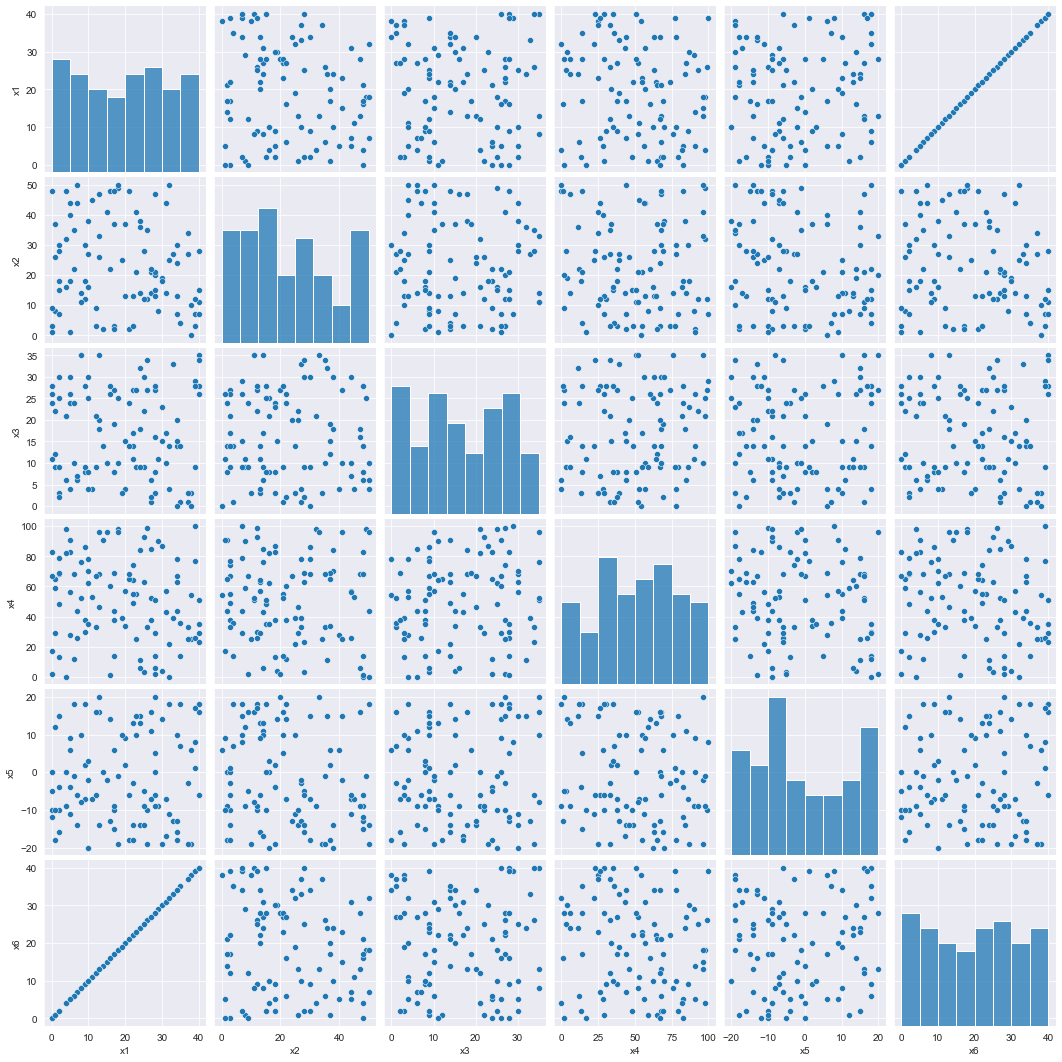

In [388]:
sns.pairplot(dataset[predictors])

In [389]:
dataset.drop(columns=['x6'], inplace=True, axis=1)
test_data.drop(columns=['x6'], inplace=True, axis=1)
predictors.remove('x6')
predictors

['x1', 'x2', 'x3', 'x4', 'x5']

In [390]:
dataset.describe().transpose()[['min', 'max', 'mean']]

,min,max,mean
x1,0.0,40.0,19.29
x2,0.0,50.0,22.53
x3,0.0,35.0,16.68
x4,0.0,100.0,50.60
x5,-20.0,20.0,-1.44
Y,-42.0,12402.0,1746.82


### Linear Regression

In [391]:
def linear_regression(x, y, pred=None):
    if pred is None:
        pred = predictors
    cv_score = np.sqrt(cross_val_score(estimator=LinearRegression(), X=x[pred], y=y, cv=5, scoring=mse))
    cv_pred = cross_val_predict(estimator=LinearRegression(), X=x[pred], y=y, cv=5)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(test_data[predictors])

    return y_pred, cv_pred, cv_score

In [392]:
lin_pred, cv_predictions, rmse_score = linear_regression(x=dataset[predictors], y=dataset['Y'])

<AxesSubplot:xlabel='x5', ylabel='Y'>

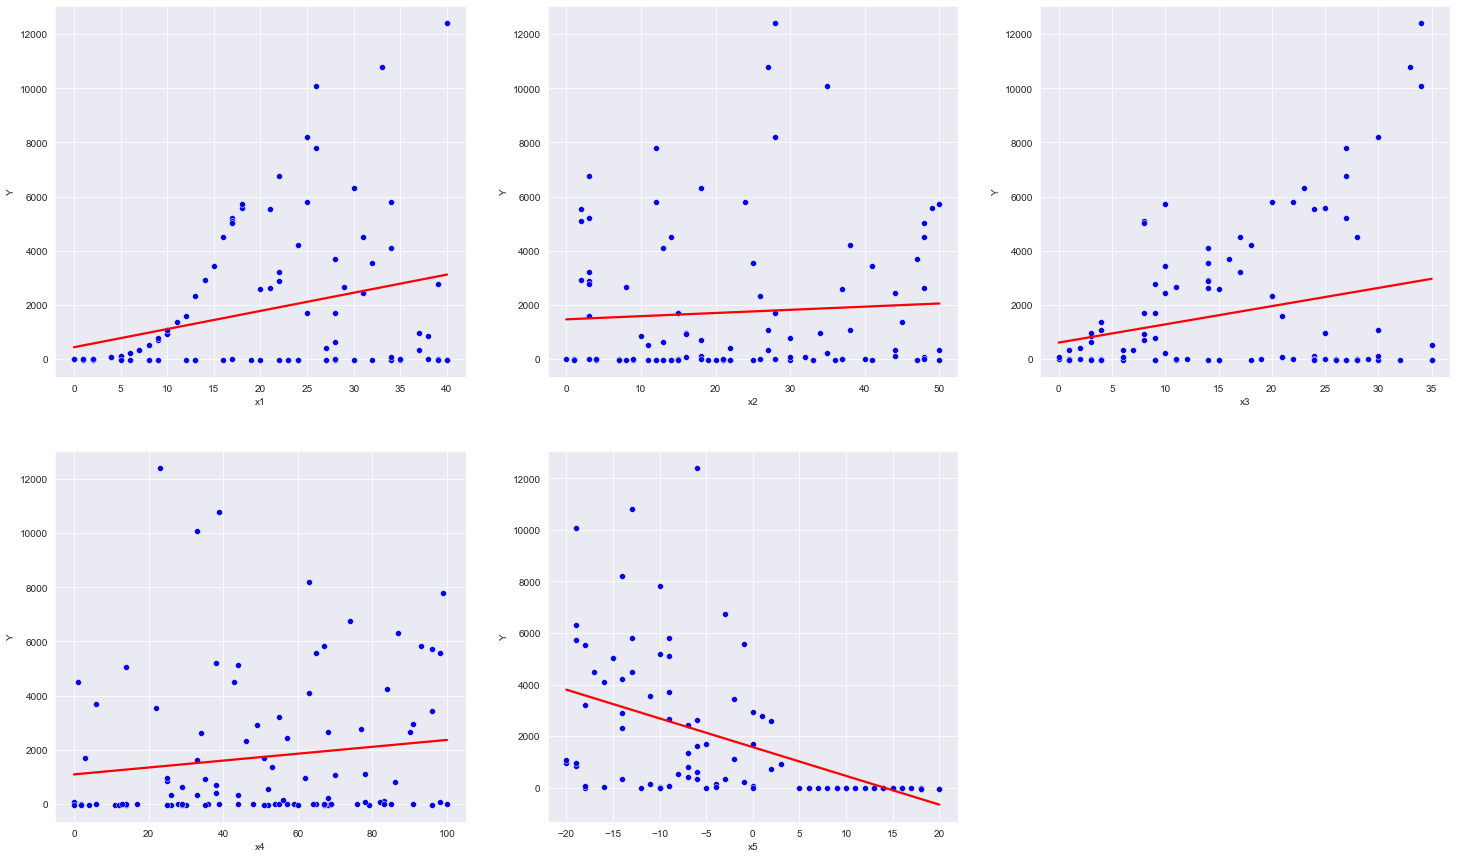

In [393]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 3, 1)
sns.scatterplot(x=dataset['x1'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x1'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 2)
sns.scatterplot(x=dataset['x2'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x2'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 3)
sns.scatterplot(x=dataset['x3'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x3'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 4)
sns.scatterplot(x=dataset['x4'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x4'], y=cv_predictions, color='r', scatter=False, ci=False)

plt.subplot(2, 3, 5)
sns.scatterplot(x=dataset['x5'], y=dataset['Y'], color='b')
sns.regplot(x=dataset['x5'], y=cv_predictions, color='r', scatter=False, ci=False)

In [394]:
errors = pd.DataFrame()

for i in predictors:
    lin_pred, cv_predictions, rmse_score = linear_regression(x=dataset[predictors], y=dataset['Y'], pred=[i])
    errors.loc['rmse', i] = np.mean(rmse_score)

errors.sort_values(by='rmse', axis=1, ascending=True)

,x5,x1,x3,x4,x2
rmse,2284.881476,2558.030689,2567.476732,2609.239499,2650.673638


### Multiple Linear Regression

In [395]:
def all_combinations(pred, n=2):
    comb = []
    for k in range(n, len(pred) + 1):
        comb.extend(list(combinations(pred, k)))
    return list(map(list, comb))

In [396]:
predictor_combinations = all_combinations(pred=predictors)

In [397]:
def multiple_linear_regression(x, y, pred=None):
    cv_score = np.sqrt(cross_val_score(estimator=LinearRegression(), X=x[pred], y=y, cv=5,
                               scoring=mse))
    cv_pred = cross_val_predict(estimator=LinearRegression(), X=x[pred], y=y, cv=5)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(test_data[predictors])

    return y_pred, cv_pred, cv_score

In [398]:
errors = pd.DataFrame()

for i in predictor_combinations:
    lin_pred, cv_predictions, rmse_score = multiple_linear_regression(x=dataset[predictors], y=dataset['Y'], pred=i)
    errors.loc[f'rmse', f'{i}'] = np.mean(rmse_score)

errors.sort_values('rmse', axis=1, ascending=True)

,"['x1', 'x3', 'x5']","['x1', 'x3', 'x4', 'x5']","['x1', 'x2', 'x3', 'x5']","['x1', 'x2', 'x3', 'x4', 'x5']","['x1', 'x4', 'x5']","['x3', 'x5']","['x1', 'x2', 'x4', 'x5']","['x1', 'x5']","['x3', 'x4', 'x5']","['x1', 'x2', 'x5']",...,"['x1', 'x3', 'x4']","['x1', 'x2', 'x3']","['x1', 'x3']","['x1', 'x2', 'x4']","['x1', 'x4']","['x1', 'x2']","['x3', 'x4']","['x2', 'x3']","['x2', 'x3', 'x4']","['x2', 'x4']"
rmse,1991.396429,1996.237096,2001.107878,2003.695876,2153.215578,2163.451841,2164.517283,2166.116951,2176.616007,2181.650425,...,2460.933037,2464.81067,2470.603104,2508.800002,2520.190686,2557.556585,2575.854631,2592.634599,2599.486401,2635.789506


#### K-Nearest Neighbors Regression (KNN)

In [399]:
def k_nearest_neighbors(x, y, k, pred=None):
    cv_score = np.sqrt(cross_val_score(estimator=KNeighborsRegressor(n_neighbors=k), X=x[pred], y=y, cv=5,
                               scoring=mse))
    cv_pred = cross_val_predict(estimator=KNeighborsRegressor(n_neighbors=k), X=x[pred], y=y, cv=5)
    knn = KNeighborsRegressor()
    knn.fit(x, y)
    y_pred = knn.predict(test_data[predictors])

    return y_pred, cv_pred, cv_score

In [400]:
errors = pd.DataFrame()

for i in predictor_combinations:
    for j in range(1, 6):
        knn_pred, cv_predictions, rmse_score = k_nearest_neighbors(x=dataset[predictors], y=dataset['Y'], k=j, pred=i)
        errors.loc[f'k={j}', f'{i}'] = np.mean(rmse_score)

errors.sort_values('k=1', axis=1)

,"['x1', 'x3', 'x5']","['x1', 'x2', 'x3', 'x5']","['x1', 'x2', 'x3', 'x4', 'x5']","['x1', 'x3', 'x4', 'x5']","['x1', 'x5']","['x1', 'x4', 'x5']","['x1', 'x2', 'x5']","['x1', 'x2', 'x3']","['x1', 'x2', 'x3', 'x4']","['x3', 'x4', 'x5']",...,"['x2', 'x4', 'x5']","['x1', 'x3']","['x1', 'x4']","['x4', 'x5']","['x2', 'x3']","['x3', 'x4']","['x2', 'x5']","['x2', 'x3', 'x4']","['x1', 'x2', 'x4']","['x2', 'x4']"
k=1,998.614011,1502.612137,1851.190792,1912.336640,2078.649429,2257.332464,2258.639434,2284.383224,2695.336470,2728.791018,...,3080.959161,3112.307131,3142.880372,3233.242412,3354.251376,3404.177818,3473.989385,3527.915476,3559.341814,3706.117239
k=2,1095.949318,1366.891639,1779.410189,1874.374497,1803.183438,2130.955516,2038.876348,1949.364104,2205.907209,2682.600063,...,2840.000271,2447.752304,2829.098639,2804.288832,3113.833953,2995.635624,2862.723591,2973.446153,2814.364748,3023.011915
k=3,1097.203971,1407.935587,1732.129623,1554.570040,1616.522425,2299.432869,1949.109410,2351.633144,2195.512527,2490.239027,...,2828.004618,2361.905983,2681.474549,2652.547255,2872.081337,2876.299833,2744.763411,2708.759265,2674.020728,3123.081620
k=4,1177.520259,1459.852014,1812.862359,1652.516710,1599.472060,2296.985084,1949.573692,2309.871240,2201.154375,2457.256560,...,2731.623977,2185.809256,2658.785059,2496.591503,2835.608390,2812.232242,2548.136386,2721.368970,2725.997343,3046.700820
k=5,1202.734601,1439.102296,1876.852361,1679.521972,1631.786478,2338.805261,1947.942047,2345.822653,2330.037642,2282.563212,...,2781.249942,2209.931484,2644.595885,2428.797337,2730.899985,2812.530886,2485.928827,2668.917204,2672.097249,3025.852833


#### Decision Tree Regression

In [412]:
def decision_tree_regression(x, y, pred=None):
    cv_score = np.sqrt(cross_val_score(estimator=DecisionTreeRegressor(), X=x[pred], y=y, cv=5, scoring=mse))
    cv_pred = cross_val_predict(estimator=DecisionTreeRegressor(), X=x[pred], y=y, cv=5)
    dt = DecisionTreeRegressor()
    dt.fit(x, y)
    y_pred = dt.predict(test_data[predictors])

    return y_pred, cv_pred, cv_score

In [413]:
errors = pd.DataFrame()

for i in predictor_combinations:
    for j in range(1, 6):
        dt_pred, cv_predictions, rmse_score = decision_tree_regression(x=dataset[predictors], y=dataset['Y'], pred=i)
        errors.loc[f'depth={j}', f'{i}'] = np.mean(rmse_score)

errors.sort_values('depth=5', axis=1)

,"['x1', 'x3', 'x5']","['x1', 'x2', 'x3', 'x5']","['x1', 'x2', 'x3', 'x4', 'x5']","['x1', 'x3', 'x4', 'x5']","['x1', 'x5']","['x1', 'x2', 'x5']","['x1', 'x4', 'x5']","['x1', 'x2', 'x4', 'x5']","['x3', 'x4', 'x5']","['x2', 'x3', 'x4', 'x5']",...,"['x2', 'x3', 'x5']","['x1', 'x3']","['x2', 'x4', 'x5']","['x1', 'x2', 'x3', 'x4']","['x1', 'x2', 'x4']","['x3', 'x4']","['x4', 'x5']","['x1', 'x4']","['x2', 'x5']","['x2', 'x4']"
depth=1,746.578523,778.099200,1063.166677,1107.667109,2041.748560,2206.631386,2263.490119,2123.241472,2744.469279,2890.784559,...,2734.695790,3074.478280,3289.515674,3164.831626,3366.341443,3460.699535,3338.188672,3621.069486,3675.867601,4075.085716
depth=2,791.270464,895.671135,976.914786,1014.925213,2105.398977,2289.185155,2169.631526,2416.913958,2946.001724,3001.711519,...,2742.375661,2969.268025,3192.280457,3040.177030,3323.968058,3316.182670,3337.189695,3619.274513,3749.044469,4039.178233
depth=3,887.905723,986.698996,999.101326,1028.642474,2096.087229,2273.734549,2050.302964,2342.446027,2951.467115,3015.819151,...,2634.224053,2976.710000,3240.476291,3008.495294,3357.361118,3366.663710,3382.291330,3580.004290,3797.020756,3957.941022
depth=4,827.605587,848.026136,993.918224,1016.769954,2022.765222,2305.538080,2147.016953,2212.689101,2738.131539,2729.549056,...,2677.533784,3085.116165,3311.261030,3054.095433,3355.120418,3311.481415,3448.453865,3583.958527,3718.148759,3892.922036
depth=5,790.512399,821.377685,985.606891,1042.618841,2073.895458,2187.460531,2193.885204,2312.688871,2785.587724,2802.843642,...,3037.303916,3100.169902,3172.748482,3177.050965,3223.232456,3347.701925,3420.308945,3625.687146,3727.444309,4066.393422
